# GeoPandas and Folium Exploration

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import random
from folium.plugins import TimestampedGeoJson

from shapely.geometry import Point
from shapely.geometry import Polygon
from geopandas import GeoSeries, GeoDataFrame

import matplotlib.pyplot as plt

In [2]:
zipfile = "zip://../data/ca-county-boundaries.zip!CA_Counties"
counties_df = gpd.read_file(zipfile)

In [3]:
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [4]:
# https://gis.stackexchange.com/questions/365400/problem-getting-correct-area-for-polygon-and-choosing-a-crs
counties_df = counties_df.to_crs("+proj=cea +lat_0=36.864225 +lon_0=-119.657316 +units=m")

In [5]:
counties_df['area'] = counties_df['geometry'].area / ((10 ** 6) * 2.59)

In [6]:
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-111128.264 4053711.722, -111121.474...",962.159817
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-170459.990 3969355.770, -170319.616...",994.308088
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-102925.285 3556754.023, -1029...",3789.120822
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-108383.997 3936903.844, -108343.142...",1036.922014
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((2337.892 3480486.777, 2363.941...",2208.238271


In [7]:
counties_df = counties_df.to_crs(epsg=4326)
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65560 39.69357, -120.65554 39.6...",962.159817
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-120.58191 34.09856, -120.5822...",3789.120822
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-120.63095 38.34111, -120.63058 38.3...",1036.922014
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-119.63631 33.27304, -119.6360...",2208.238271


In [8]:
# drop uncessary columns
counties_df.drop(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAMELSAD', 'LSAD', 'CLASSFP', 'CSAFP', 'CBSAFP', 
              'METDIVFP', 'FUNCSTAT', 'ALAND', 'AWATER'], axis = 1, inplace = True)


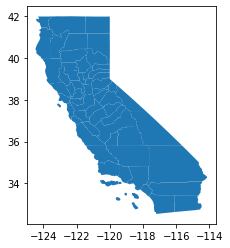

In [9]:
counties_df.plot();

In [10]:
predictions_df = pd.read_csv('../clean_data/predictions.csv')
predictions_df.head()

,Unnamed: 0,7dayrollingavg_newlyconfirmed,County
0,2020-09-27,5.572982,Alameda
1,2020-09-28,5.402031,Alameda
2,2020-09-29,5.419126,Alameda
3,2020-09-30,4.726777,Alameda
4,2020-10-01,4.367782,Alameda


In [11]:
predictions_df['Unnamed: 0'] = pd.to_datetime(predictions_df['Unnamed: 0'])
predictions_df.set_index('Unnamed: 0')

,7dayrollingavg_newlyconfirmed,County
Unnamed: 0,,
2020-09-27,5.572982,Alameda
2020-09-28,5.402031,Alameda
2020-09-29,5.419126,Alameda
2020-09-30,4.726777,Alameda
2020-10-01,4.367782,Alameda
...,...,...
2021-02-10,46.415821,Yuba
2021-02-11,46.415821,Yuba
2021-02-12,46.415821,Yuba


In [12]:
len(predictions_df['County'].unique())

56

In [13]:
predictions_df[predictions_df['County'] == 'Sierra']

,Unnamed: 0,7dayrollingavg_newlyconfirmed,County


In [14]:
pred_map_df = counties_df.merge(predictions_df, how = 'inner', left_on = 'NAME', right_on = 'County')
pred_map_df.head()

,NAME,MTFCC,INTPTLAT,INTPTLON,geometry,area,Unnamed: 0,7dayrollingavg_newlyconfirmed,County
0,Sacramento,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-27,8.854603,Sacramento
1,Sacramento,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-28,7.584400,Sacramento
2,Sacramento,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-29,7.381904,Sacramento
3,Sacramento,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-30,7.289860,Sacramento
4,Sacramento,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-10-01,6.709985,Sacramento


In [20]:
pred_map_df['newlyconfirmed_per_area'] = pred_map_df['7dayrollingavg_newlyconfirmed'] / pred_map_df['area']
pred_map_df.head()

,MTFCC,INTPTLAT,INTPTLON,geometry,area,date,7dayrollingavg_newlyconfirmed,County,newlyconfirmed_per_area
0,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-27,8.854603,Sacramento,0.008905
1,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-28,7.584400,Sacramento,0.007628
2,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-29,7.381904,Sacramento,0.007424
3,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-09-30,7.289860,Sacramento,0.007332
4,G4020,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7...",994.308088,2020-10-01,6.709985,Sacramento,0.006748


In [15]:
geo_json = pred_map_df[0:1]['geometry'].to_json()
geo_json

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[-121.1885841398944, 38.714313106954066], [-121.18732313968441, 38.7142081070413], [-121.18690613961503, 38.71417410707023], [-121.1866661395751, 38.714154107086806], [-121.18543813937067, 38.71405310717188], [-121.1848881392791, 38.714007107209895], [-121.18354213905488, 38.713895107303074], [-121.1824711388766, 38.71380710737726], [-121.18228213884521, 38.71379210739042], [-121.18221813883463, 38.71378710739485], [-121.18217713882783, 38.71378410739774], [-121.18207113881016, 38.713775107405006], [-121.18202713880278, 38.71377110740805], [-121.18196413879245, 38.7137671074125], [-121.18192113878662, 38.71377410741636], [-121.1818611387771, 38.713773107420835], [-121.1817921387641, 38.71375510742464], [-121.18176313875942, 38.713754107426716], [-121.1817501387573, 38.713753107427635], [-121.17987113847117, 38.713813107576016], [-121.178753138303

In [16]:
#pred_map_df.set_index('Unnamed: 0', inplace = True)
pred_map_df.drop('NAME', axis = 1, inplace = True)

In [17]:
pred_map_df.rename({'Unnamed: 0': 'date'}, inplace = True, axis = 1)
pred_map_df['date'] = pred_map_df['date'].astype(str)

In [18]:
def random_html_color():
    r = random.randint(0,256)
    g = random.randint(0,256)
    b = random.randint(0,256)
    return '#%02x%02x%02x' % (r, g, b)

def style_fcn(x):
    return { 'fillColor': random_html_color() }

In [19]:
covid_map = folium.Map(location = [37.605970, -120.005828], zoom_start = 6)
folium.GeoJson(geo_json, style_function = style_fcn).add_to(covid_map)
covid_map

In [28]:
covid_map

In [ ]:
def create_geojson_features(df):
    print('> Creating GeoJSON features...')
    features = []
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type': row['geometry'].geom_type, 
                'coordinates': [list(row['geometry'].)]
            },
            'properties': {
                'time': row.name.date().__str__(),
                'style': {'color' : row['color']},
                'icon': 'circle',
                'iconstyle':{
                    'fillColor': row['color'],
                    'fillOpacity': 0.8,
                    'stroke': 'true',
                    'radius': 7
                }
            }
        }
        features.append(feature)
    return features

In [21]:
q_list = range(0,30)
np.random.choice(q_list)

24